# Síntesis de redes no disipativas doblemente cargadas
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 

En este notebook aplicarán los conceptos de síntesis de inmitancias para la síntesis de un filtro pasabanda cargado tanto en su entrada como la salida. Se presentarán los parámetros scattering necesarios para la síntesis y las de dichos parámetros para redes no disipativas. 

Se usarán algunas funciones de PyTC2 para realizar los cálculos y presentar los resultados.

* Funciones de dibujo de redes: [dibujar_puerto_entrada](), [dibujar_funcion_exc_abajo](), [dibujar_elemento_derivacion](), [dibujar_espacio_derivacion](), [dibujar_elemento_serie]()
* Funciones de síntesis de dipolos: [remover_polo_infinito](), [remover_valor_en_infinito]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

La síntesis de redes eléctricas no disipativas doblemente cargadas es de especial utilidad para el diseño de filtros de alta frecuencia y/o potencia. Este método fue originalmente propuesto por [Sidney Darlington](https://en.wikipedia.org/wiki/Sidney_Darlington) en 1939, permitiendo que un filtro cumpla con una respuesta prescrita de pérdidas por inserción, como las de Butterworth, Chebyshev y Bessel. El gran aporte de Darlington fue relacionar las pérdidas de inserción con las de retorno, y en consecuencia con la impedancia de entrada de la red, siempre que la red sea no disipativa. Con el tiempo el método se adaptó a los **parámetros de dispersión** (S ó scattering), que están íntimamente relacionados con las pérdidas de un filtro.

Los **parámetros S** son útiles en el análisis de redes cuando se tienen cargas en ambos puertos. Estos parámetros relacionan las ondas normalizadas incidentes ($a$) y reflejadas ($b$) en cada plano de referencia (puerto en éste contexto) del cuadripolo:

![nada](./img/nada.png)
<div style="text-align: center;"><img src="./img/sint_transf_tension_doble.png" alt="spar" style="width:600px;"></div>

Se plantea el modelo lineal para el cuadripolo 


$$ b = S \cdot a $$

o de forma explícita para cada puerto

$$
\begin{pmatrix} b_1 \\ b_2 \end{pmatrix} = \begin{pmatrix} S_{11} & S_{12} \\ S_{21} & S_{22} \end{pmatrix} \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}
$$

Habrá dos tipos de parámetros:

Un coeficiente de reflexión por cada puerto $x$, denominado $S_{xx}$ mientras el puerto restante está cargado con la resistencia característica $ R_{G1} =  R_{G2} = R_0 $. Para un filtro de dos puertos se tiene entonces:
   $$
   S_{11} = \frac{b_1}{a_1} \Bigg|_{a_2 = 0} = \frac{Z_1 - R_0}{Z_1 + R_0}
   $$
   $$
   S_{22} = \frac{b_2}{a_2} \Bigg|_{a_1 = 0} = \frac{Z_2 - R_0}{Z_2 + R_0}
   $$
  
Siendo $Z_x$ la impedancia vista desde el plano $x$ hacia el cuadripolo cuando se conecta en el otro puerto $R_0$.

También habrá un coeficiente de transmisión para modelar el flujo de potencia del puerto $x$ al puerto $y$, denominado $ S_{yx} $. Circuitalmente se modela con un generador $V_{gx}$ con resistencia interna $R_{Gx}$ y una carga $R_{Gy}$ en el puerto $y$. Resulta entonces

   $$
   S_{21} = \frac{b_2}{a_1} \Bigg|_{a_2 = 0} = \frac{V_2}{V_{G1}/2} \cdot \sqrt{\frac{R_{G1}}{R_{G2}}}
   $$
   $$
   S_{12} = \frac{b_1}{a_2} \Bigg|_{a_1 = 0} = \frac{V_1}{V_{G2}/2} \cdot \sqrt{\frac{R_{G2}}{R_{G1}}}
   $$

Para un sistema pasivo y no disipativo, se cumple que la matriz de parámetros $S$ es **unitaria**. Esto significa que:

$$ S^H \cdot S = U $$

siendo $ S^H $ la matriz conjugada y transpuesta, o *Hermitiana*, y $U$ la matriz unitaria. Entonces los parámetros $S$ cumplen que

$$
S_{11}^* S_{11} + S_{21}^* S_{21} =|S_{11}|^2 + |S_{21}|^2 = 1
$$
$$
|S_{22}|^2 + |S_{12}|^2 = 1
$$
$$
S_{11} S_{12}^* + S_{21} S_{22}^* = 0
$$
donde el operador $*$ indica el conjugado complejo. La primera ecuación es de vital importancia, porque indica que toda la potencia disponible en el puerto 1 que no se transmita, necesariamente debe reflejarse al generador ya que el cuadripolo no podrá disiparla. La tercera ecuación también será importante más adelante cuando se generalice el enfoque. Retomando, el parámetro $|S_{11}|^2$ estará condicionado por

$$
|S_{11}|^2 =  1 - |S_{21}|^2
$$

que a su vez

$$
|S_{11}|^2 =  S_{11}^* S_{11} = S_{11}(-s)  S_{11}(s)
$$

es decir que podemos hallar el factor $S_{11}(s)$ a partir de una restricción en el ratio de potencias $|S_{21}|^2$. Como ya se anticipó, [Sidney Darlington](https://en.wikipedia.org/wiki/Sidney_Darlington) propuso un método de síntesis muy elegante, en el que a partir de dicha restricción se condiciona la impedancia de entrada al cuadripolo, sabiendo que

$$
S_{11} = \pm \frac{ Z_1 - R_0}{ Z_1 + R_0}
$$

Notar que el signo de $S_{11}$ es un grado de libertad con el que se cuenta a la hora de sintetizar. Entonces la impedancia en el puerto de entrada será, dependiendo la elección del signo de $S_{11}$

$$
Z_1 = R_0 \cdot \frac{1 \pm S_{11}}{1 \mp S_{11}}
$$

Cabe destacar que si bien $Z_1$ contempla la impedancia vista hacia un cuadripolo no disipativo, debe recordarse que la condición de medición de $S_{11}$ asume que el puerto 2 esté cargado con $R_{G2} = R_0$. Por este motivo, $Z_1$ será una impedancia RLC **muy particular**, dado que estará compuesta por una inmitancia no disipativa seguida de la carga $R_0$ al final. Esto permite que todos los métodos de síntesis vistos hasta el momento sean aplicables para diseñar el cuadripolo no disipativo, con la particularidad de que el último componente será $R_0$.

### Un enfoque alternativo

A esta altura está claro que los parámetros S de un filtro no disipativo cargado en ambos extremos está condicionado por la ecuación de complementaridad

$$
|S_{11}|^2 +  |S_{21}|^2 =  1
$$

De la misma podemos expresar, siguiendo el enfoque propuesto por *Cameron et. al.*

$$ S_{21} =  \frac{P(s)}{\epsilon \cdot E(s)} $$

donde $\epsilon$ será un factor de escala para que ambos polinomios $P$ y $E$ sean *mónicos*. Entonces, simplificando la dependencia de $s$

$$ |S_{21}|^2 =  \frac{P . P^*}{\epsilon^2 \cdot (E . E^*)} $$

y en consecuencia

$$
|S_{11}|^2  = \frac{\epsilon^2 \cdot (E . E^*) - P . P^*}{E . E^*} = \frac{F . F^*}{\epsilon_R^2 \cdot (E . E^*)} 
$$

es decir que del mismo modo que con $ S_{21}$, también se podrá expresar

$$
S_{11} = \pm \frac{F(s)}{\epsilon_R \cdot E(s)} 
$$

y es claro que todos los parámetros compartirán los mismos polos definidos por $E(s)$. Es decir que la matriz S se puede expresar como

$$
S = \begin{pmatrix} S_{11} & S_{12} \\ S_{21} & S_{22} \end{pmatrix} =  \frac{1}{E(s)} \begin{pmatrix}  \frac{F(s)}{\epsilon_R} & \frac{P(s)}{\epsilon} \\ \frac{P(s)}{\epsilon} & \frac{F(s)}{\epsilon_R} \end{pmatrix} 
$$

Se simplifican algunos detalles para facilitar el ejemplo que se presentará a continuación (Ver *Cogollos* cap 2. ó *Cameron et. al.* cap. 6 para un tratamiento general).

Finalmente podemos expresar la impedancia de entrada al filtro como

$$
Z_1 = R_0 \cdot \frac{1 \pm S_{11}}{1 \mp S_{11}} = R_0 \cdot \frac{\epsilon_R.E \pm F}{\epsilon_R.E \mp F}
$$

Resta por aclarar cómo se calculan las constantes $\epsilon$ y $\epsilon_R$, que permitirán fijar las pérdidas de transmisión y retorno en frecuencias señaladas dependiendo de las características del filtro, pero eso lo dejaremos para más adelante por ahora.

### Referencias

1. [Richard J. Cameron, Chandra M. Kudsia, Raafat R. Mansour. *Microwave Filters for Communication Systems Fundamentals, Design and Applications. (2007). John Wiley & Sons](https://drive.google.com/file/d/1Fdr5WT8e7g9W5j4YM5Xd0-Za1BhrlQQ_/view?usp=drive_link)
2. [Cogollos Borrás, Santiago. *Fundamentos de la Teoría de Filtros*. (2016). Editorial de la Universitat Politècnica de València.](https://drive.google.com/file/d/1g4pgNS1m9dF43ZyR6LdkE-HAntfswhwh/view?usp=drive_link)


In [1]:
import sympy as sp
import numpy as np

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_infinito, remover_polo_jw, isFRP, modsq2mod_s, trim_func_s

from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Importante importar símbolos de variables 
from pytc2.general import s, w, simplify_n_monic


## Ejemplo 1: Pasabanda Butterworth

Implemente un filtro pasabanda Butterworth de 4º orden con un $Q = 5$.

Aprovechando que este método nos permite un grado de detalle tan preciso para establecer la función transferencia $S_{21}$, se procede a hallar la función transferencia que satisface dicho requerimiento. Para ello se retomamará el análisis que hicimos en el notebook [núcleo de transformación pasabanda](ejnb_transformacion_pasabanda.ipynb). En resumen, a partir de una transferencia pasabajos *Butterworth* de segundo orden, se llega a 

$$ T_{bp}(s) = \frac{s^2 \cdot 0.04}{s^4 + s^3 \cdot 0.2828+s^2 \cdot 2.04+ s \cdot 0.2828 + 1} $$ 

luego simplemente se asume que $ S_{21} = T_{bp} $. Debido a la complejidad de la expresión, el ejercicio demandará cierta destreza algebraica que puede suplirse gracias a las capacidades simbólicas de PyTC2 y SymPy.

Comenzamos buscando la expresión de $Z_1$ a partir de  $S_{11}$, no sin antes definir $S_{21}$.

In [2]:
# Resolución simbólica

# Q de la transformación
Q_bp = sp.Rational(5)
Q_lp = sp.sqrt(2)/2

# nucleo de transformación pasabanda
Kbp = Q_bp * (s**2 + 1) / s

T2proto = 1/(s**2 + s * 1/Q_lp + 1)

H2bp = sp.simplify(sp.expand(T2proto.subs(s, Kbp)))

S21 = H2bp

ks21, Ps, Es = simplify_n_monic(S21)

S21 = ks21 * Ps / Es

print_latex(a_equal_b_latex_s('S_{21}', S21))

print_subtitle('Corroboramos ganancia $\le 1$ el centro de la banda de paso')
print_latex(a_equal_b_latex_s('S_{21}(\omega = 1)', sp.simplify(sp.expand(sp.Abs(S21.subs(s, sp.I*1)))).evalf(4) ))



<IPython.core.display.Math object>

#### Corroboramos ganancia $\le 1$ el centro de la banda de paso

<IPython.core.display.Math object>

Luego se procede a hallar el parámetro $S_{11}$, que será su complementario en potencia.

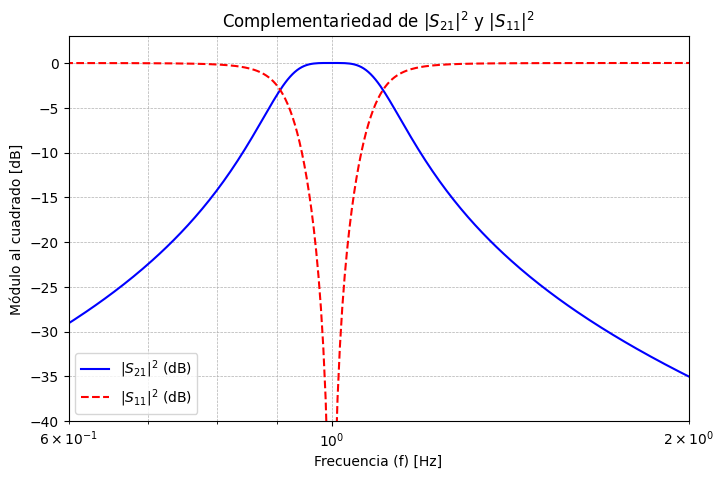

In [3]:
import matplotlib.pyplot as plt

def plt_Sparams(S21sq, S11sq, bDb = True ):
        
    # Convertir las funciones simbólicas a funciones numéricas para evaluar
    mod_S21_squared_func = sp.lambdify(w, S21sq.subs(s, sp.I*w), modules='numpy')
    mod_S11_squared_func = sp.lambdify(w, S11sq.subs(s, sp.I*w), modules='numpy')
    
    # Crear un rango de frecuencias para graficar
    frequencies = np.logspace(-1, 1, 1000)
    
    # Evaluar las funciones en el rango
    S21_vals = mod_S21_squared_func(frequencies)
    S11_vals = mod_S11_squared_func(frequencies)
    
    if bDb:
        # Convertir a decibelios (10 * log10(valor))
        S21_dB = 10 * np.log10(S21_vals)
        S11_dB = 10 * np.log10(S11_vals)
        s21_lbl = r'$|S_{21}|^2$ (dB)'
        s11_lbl = r'$|S_{11}|^2$ (dB)'
        ylbl = 'Módulo al cuadrado [dB]'
        
    else:
        S21_dB = S21_vals
        S11_dB = S11_vals
        s21_lbl = r'$|S_{21}|^2$'
        s11_lbl = r'$|S_{11}|^2$'
        ylbl = 'Módulo al cuadrado'
            
    
    # Graficar en escala log-log
    plt.figure(1, figsize=(8, 5))
    plt.semilogx(frequencies, S21_dB, label=s21_lbl, color='blue')
    plt.semilogx(frequencies, S11_dB, label=s11_lbl, color='red', linestyle='--')
    plt.xlabel('Frecuencia (f) [Hz]')
    plt.ylabel(ylbl)
    plt.title(r'Complementariedad de $|S_{21}|^2$ y $|S_{11}|^2$')
    plt.legend()
    plt.grid(which='both', linestyle='--', linewidth=0.5)


S21sq = sp.simplify(sp.expand(S21 * S21.subs(s, -s)))

S11sq = sp.simplify(sp.expand(1 - S21sq))

plt_Sparams(S21sq, S11sq, bDb = True)

plt.ylim([-40, 3])
plt.xlim([.6, 2])
plt.show()


Es interesante notar que las pérdidas por retorno ($R_L$) son inferiores a 20 dB solo en una pequeña parte de la banda pasante del filtro. Recordar que 

$$
R_L = -20.\log|S_{11}|
$$

mientras que las pérdidas por insersión $I_L$

$$
I_L = -20.\log|S_{21}|
$$

También se aprecia la complementaridad de ambos parámetros $S_{21}$ y $S_{11}$, aunque es necesario visualizarlos en unidades lineales para poder tener certeza que suman 1 a cualquier frecuencia.

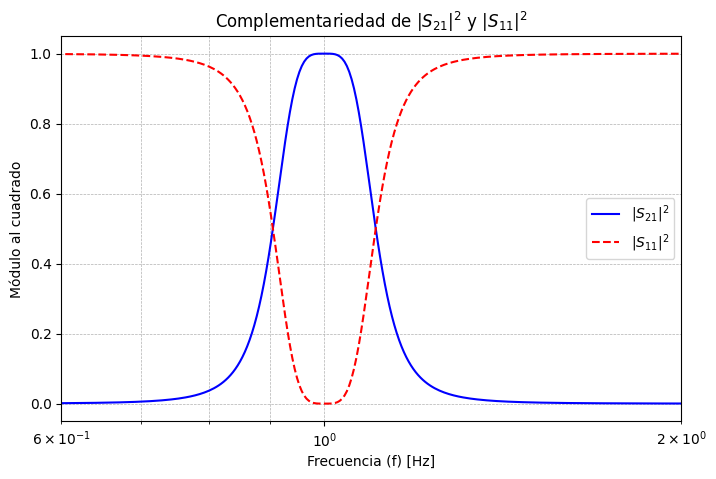

In [4]:
plt_Sparams(S21sq, S11sq, bDb = False)

plt.xlim([.6, 2])
plt.show()


Asegurar que un filtro mantenga en su banda de paso las $R_L$ por debajo de 20 dB es equivalente a asegurar la adaptación al generador y a la carga. Para ello se buscará la relación entre las $R_L$ y el parámetro $\epsilon$.

Entonces volviendo a la ecuación de complementaridad

$$
|S_{11}|^2 +  |S_{21}|^2 =  1 
$$
$$
1 + \frac{|S_{21}|^2}{|S_{11}|^2}  =  \frac{1}{|S_{11}|^2} = 10^{\frac{R_L}{10}}
$$
tenemos
$$
1 + \frac{\epsilon_R^2}{\epsilon^2} \cdot \left|\frac{P(s)}{F(s)}\right|^2 = 10^{\frac{R_L}{10}}
$$

Como el filtro que estamos analizando no tiene ceros de transmisión en frecuencias finitas, debe cumplir la condición de unitariedad en los extremos, donde $|S_{21}|=0$, luego

$$
\lim_{\omega \to \infty} |S_{11}(s)|^2 + 0 = 1
$$

$$
\lim_{\omega \to \infty} \left| \frac{F(s)}{\epsilon_R.E(s)} \right| = 1
$$

recordando que ambos polinomios son mónicos, entonces $\epsilon_R = 1$, y en consecuencia

$$
\epsilon = \frac{1}{\sqrt{10^{R_L/10} - 1}} \cdot \left|\frac{P(s)}{F(s)}\right| 
$$

En el caso de nuestro pasabanda, partimos de un *prototipo pasabajo* donde aseguraremos $R_L \leq$ 20 dB en la banda de paso. Para ello sabemos que $P(s)=1$ para el caso de un pasabajo *Butterworth*. Del mismo modo $F(s)= s^2$ y para $s = j.1$ r/s tendremos $\left|F(s)\right| = 1$. Luego simplemente resta calcular

$$
\epsilon = \frac{1}{\sqrt{10^{R_L/10} - 1}}
$$

para $R_L = 20$ db en el límite de la banda de paso.

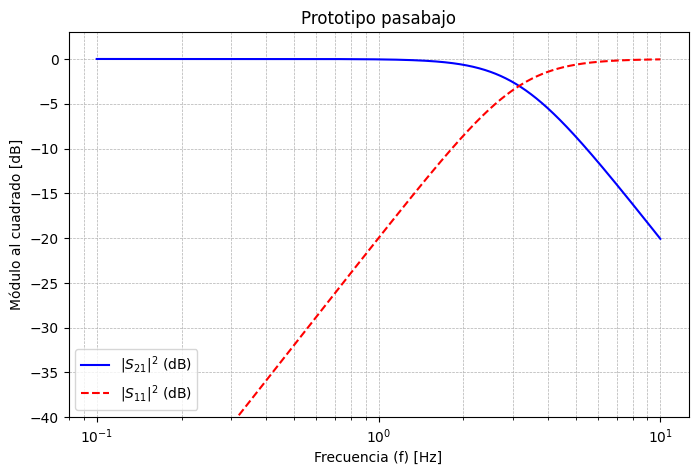

In [5]:
RL = 20 # dB
eps_sq = sp.Rational(1)/sp.Rational(10**(RL/10)-1)

S21sq_proto = 1/(1+ sp.Rational(eps_sq) * (s/sp.I)**4)

S11sq_proto = sp.simplify(sp.expand(1 - S21sq_proto))

plt_Sparams(S21sq_proto, S11sq_proto, bDb = True)

plt.title('Prototipo pasabajo')
plt.ylim([-40, 3])
plt.show()


Se verifica entonces que el prototipo pasabajo cumple con el requerimiento de $R_L$. Luego se procede a calcular el filtro pasabanda

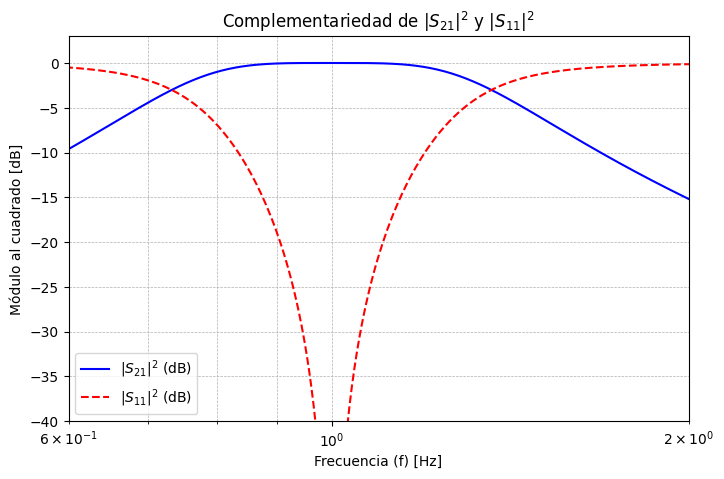

In [6]:
S21sq = sp.simplify(sp.expand(S21sq_proto.subs(s, Kbp)))

S11sq = sp.simplify(sp.expand(1 - S21sq))

plt_Sparams(S21sq, S11sq, bDb = True)

plt.ylim([-40, 3])
plt.xlim([.6, 2])
plt.show()


En este caso verificamos que el pasabanda también cumple el requerimiento de $R_L$ en el ancho de banda especificado por $Q=5$, es decir $B = \omega_0/Q = 1/5$.

Ahora procedemos a calcular $S_{21}$ y $S_{11}$.

In [17]:
# A veces puede tener sentido forzar el signo para hallar la red
# dual.
S11_sign = 1
# s11_sign = -1

# Cuando se demora mucho en factorizar se puede probar bTryNumeric=True
S21 = modsq2mod_s(S21sq, bTryNumeric=True)
S11 = S11_sign * modsq2mod_s(S11sq, bTryNumeric=True)

# Truquito, S21 y S11 comparten polos
ks21, Ps, Es = simplify_n_monic(S21)
ks11, Fs, _ = simplify_n_monic(S11)

S11 = ks11 * Fs / Es
S21 = ks21 * Ps / Es

print_latex(a_equal_b_latex_s('S_{11}', S11.evalf(4)))
print_latex(a_equal_b_latex_s('S_{21}', S21.evalf(4)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculamos entonces $Z_1$ a partir de $S_{11}$

In [18]:

Z1 = sp.simplify(sp.expand(Es + Fs) / sp.expand(Es - Fs))

print_latex(a_equal_b_latex_s('Z_1', Z1.evalf(4)))
print_subtitle('Corroboramos $Z_1$ en el centro de la banda de paso')
print_latex(a_equal_b_latex_s('Z_1(\omega = 1)', sp.simplify(sp.expand(sp.Abs(Z1.subs(s, sp.I*1)))).evalf(4) ))


<IPython.core.display.Math object>

#### Corroboramos $Z_1$ en el centro de la banda de paso

<IPython.core.display.Math object>

Ahora se procede con la síntesis de $Z_1$ siguiendo los ceros de la transferencia. En este caso tendremos dos ceros en cada extremo de banda.

In [10]:
print_subtitle('1º Remoción en $\infty$')

Z2, ZL1 = remover_polo_infinito(Z1)

# ZL1 es la impedancia removida
# extraigo L1
L1 = ZL1/s

print_latex(a_equal_b_latex_s('L_1', L1.evalf(4)))
print_latex(a_equal_b_latex_s('Z_2', Z2.evalf(4)))

print_subtitle('Se descartarán los coeficientes poco significativos')

Z2 = trim_func_s(Z2)
print_latex(a_equal_b_latex_s('Z_2', Z2.evalf(4)))



#### 1º Remoción en $\infty$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Se descartarán los coeficientes poco significativos

<IPython.core.display.Math object>

Como puede apreciarse, las funciones de remoción fallan al aproximar el valor de los residuos y en consecuencia la remoción total nunca sucede. Para ello hace falta un poco de práctica y conocimiento del método de síntesis para proceder a la cancelación de aquellos términos residuales.

In [11]:
print_subtitle('2º Remoción en $0$')

Z4, ZC1 = remover_polo_dc(Z2)

# ZC1 es la impedancia removida
# extraigo C1
C1 = 1/ZC1/s

print_latex(a_equal_b_latex_s('C_1', C1.evalf(4)))
print_latex(a_equal_b_latex_s('Z_4', Z4.evalf(4)))

print_subtitle('Poda de coeficientes y ...')

Z4 = trim_func_s(Z4)
print_latex(a_equal_b_latex_s('Z_4', Z4.evalf(4)))


#### 2º Remoción en $0$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Poda de coeficientes y ...

<IPython.core.display.Math object>

luego de haber removido en ambos extremos de impedancia, procedemos a remover en admitancia para finalizar la síntesis.

In [19]:
print_subtitle('3º Remoción en $\infty$')

Y6, YC2 = remover_polo_infinito(1/Z4)

# ZL1 es la admitancia removida
# extraigo C2
C2 = YC2/s

Y6 = trim_func_s(Y6)

print_latex(a_equal_b_latex_s('C_2', C2.evalf(4)))
print_latex(a_equal_b_latex_s('Y_6', Y6.evalf(4)))



#### 3º Remoción en $\infty$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

en el otro extremo removeremos el último componente

In [21]:
print_subtitle('4º Remoción en $0$')

Y8, YL2 = remover_polo_dc(Y6)

# YL2 es la admitancia removida
# extraigo L2
L2 = 1/YL2/s

Y8 = trim_func_s(Y8)

print_latex(a_equal_b_latex_s('L_2', L2.evalf(4)))
print_latex(a_equal_b_latex_s('Y_8', Y8.evalf(4)))


#### 4º Remoción en $0$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Y finalmente el remanente $Y_8$ es la resistencia de carga en el puerto de salida del filtro. Con esto finalizamos la síntesis y procedemos a visualizar la red resultante

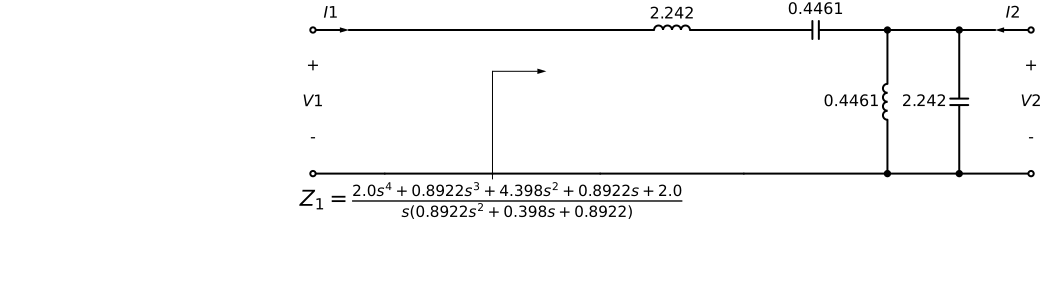

In [16]:
from pytc2.dibujar import dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_serie, dibujar_funcion_exc_abajo, dibujar_espacio_derivacion
from schemdraw import Drawing

d = dibujar_puerto_entrada( Drawing(unit=4),
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d = dibujar_funcion_exc_abajo(d, 'Z_1',  
                                  Z1.evalf(4), 
                                  hacia_salida = True,
                                  k_gap_width = 1.5)

d = dibujar_elemento_serie(d, 'L', L1.evalf(4))

d = dibujar_elemento_serie(d, 'C', C1.evalf(4))

d = dibujar_elemento_derivacion(d, 'L', L2.evalf(4))

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, 'C', C2.evalf(4))

d = dibujar_puerto_salida(d,
                          voltage_lbl = ('+', '$V2$', '-'), 
                          current_lbl = '$I2$')

display(d)

Finalizamos el ejemplo con una simulación circuital de los parámetros del filtro diseñado.

![LTspice](./img/sint_doble_cargada_ltspice1.png)


Con este ejemplo se finaliza el documento.